In [13]:
import collections
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

from IPython.display import display

from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.grid_search import GridSearchCV

get_ipython().magic(u'matplotlib inline')

Adding column GP
Adding column W
Adding column SO
Adding column SV%
Adding column GAA
Adding column W_per_GP
Adding column SO_per_GP
Adding column SV_per_GP
Predicting GP with ['age', 'GAA_lag', 'GP_lg_wt_avg', 'GP_lag2', 'GP_wt_avg', 'SV%_lag', 'W_lag', 'GP_lg_wt_delta', 'GP_lag']
Dropped 1 rows for missing values
Chosen model = GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1,
             loss='huber', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_samples_leaf=50,
             min_samples_split=300, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
RSME = 13.5504036261
Spearman correlation = 0.647786249843
Test performance best at 84 trees


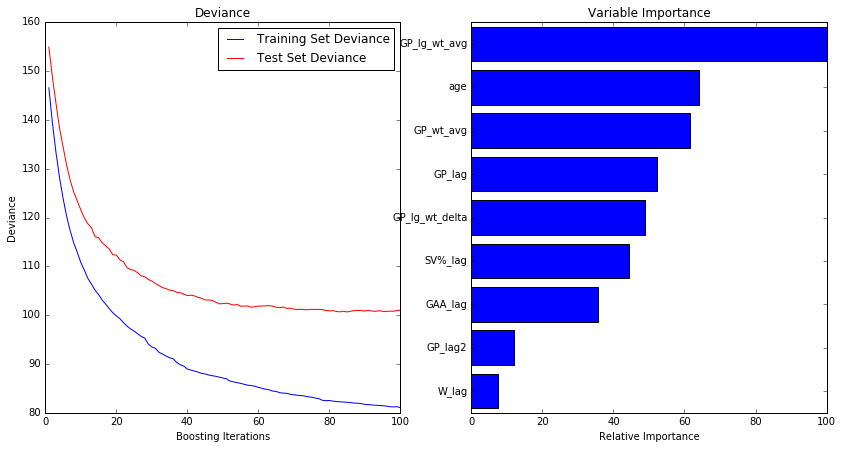

________________________________________________________________________________
Custom plot via ``partial_dependence``



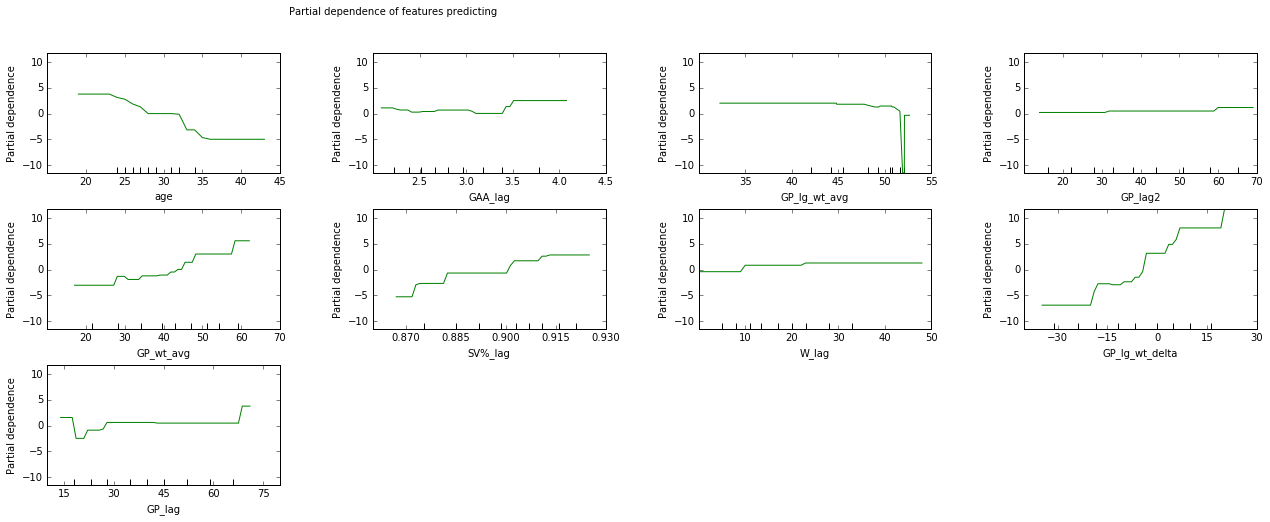

Predicting W_per_GP with ['W_per_GP_lg_wt_avg', 'W_per_GP_lag', 'W_per_GP_lag2', 'W_per_GP_wt_avg', 'W_lag', 'W_per_GP_lg_wt_delta', 'age', 'GP_lag']
Dropped 0 rows for missing values
Chosen model = GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1,
             loss='huber', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_samples_leaf=50,
             min_samples_split=200, min_weight_fraction_leaf=0.0,
             n_estimators=50, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
RSME = 0.115683535325
Spearman correlation = 0.509073474083
Test performance best at 23 trees


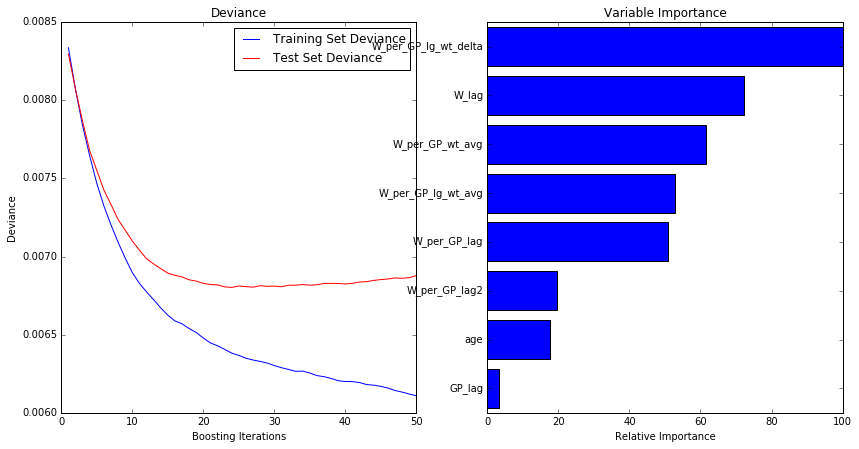

________________________________________________________________________________
Custom plot via ``partial_dependence``



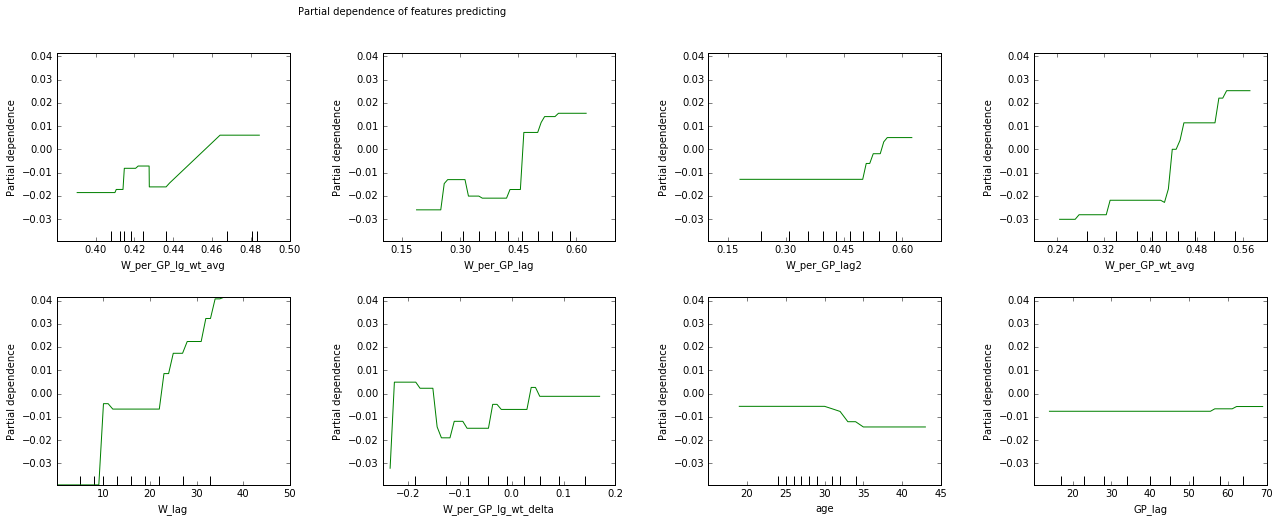

Predicting SO_per_GP with ['SO_per_GP_lag', 'SO_per_GP_lg_wt_avg', 'age', 'SO_per_GP_wt_avg', 'W_lag', 'SO_per_GP_lag2', 'SO_per_GP_lg_wt_delta', 'GP_lag']
Dropped 0 rows for missing values
Chosen model = GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1,
             loss='huber', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_samples_leaf=20,
             min_samples_split=500, min_weight_fraction_leaf=0.0,
             n_estimators=50, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
RSME = 0.0374457195231
Spearman correlation = 0.467398689469
Test performance best at 44 trees


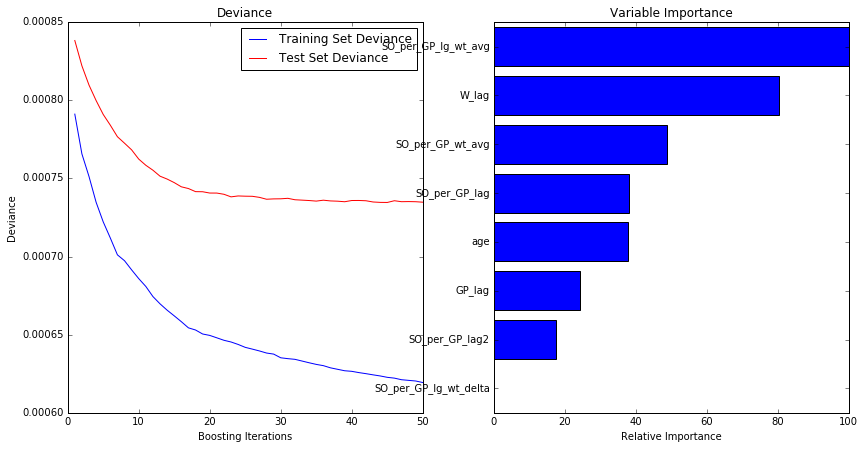

________________________________________________________________________________
Custom plot via ``partial_dependence``



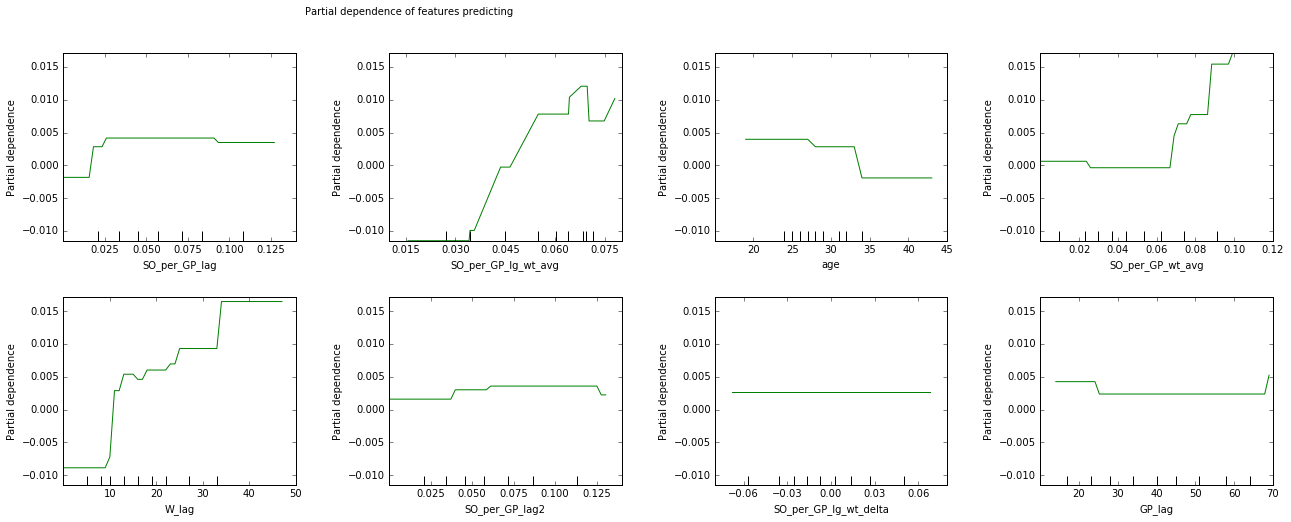

Predicting GAA with ['GAA_lg_wt_delta', 'age', 'GAA_lag', 'GAA_wt_avg', 'GP_avg', 'GAA_lg_wt_avg', 'GAA_lag2', 'GP_lag']
Dropped 0 rows for missing values
Chosen model = GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1,
             loss='huber', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_samples_leaf=20,
             min_samples_split=200, min_weight_fraction_leaf=0.0,
             n_estimators=50, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
RSME = 0.427092626468
Spearman correlation = 0.726850938273
Test performance best at 27 trees


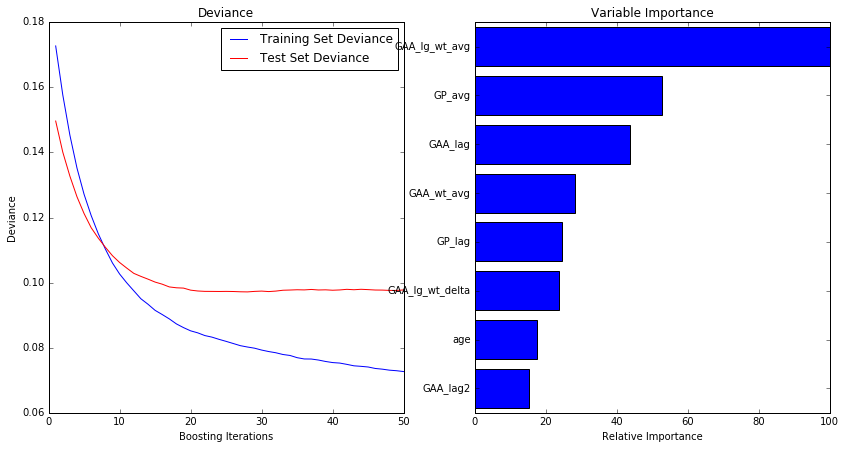

________________________________________________________________________________
Custom plot via ``partial_dependence``



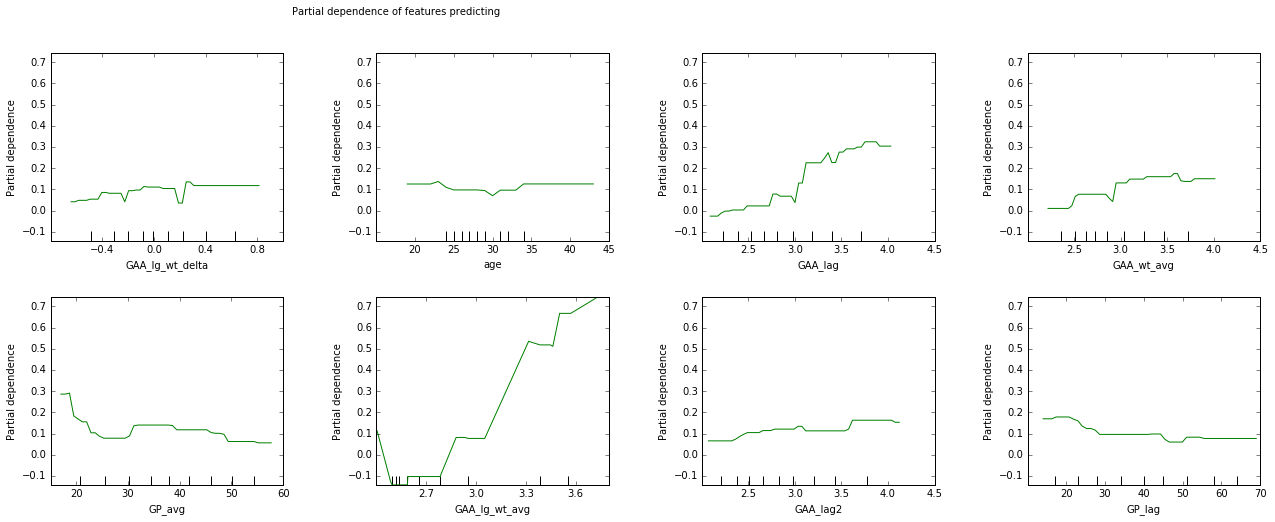

Predicting SV% with ['SV%_wt_avg', 'SV%_lg_wt_avg', 'SV%_lg_wt_delta', 'GP_avg', 'SV%_lag2', 'GP_lag', 'age', 'SV%_lag']
Dropped 1 rows for missing values
Chosen model = GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1,
             loss='huber', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_samples_leaf=20,
             min_samples_split=100, min_weight_fraction_leaf=0.0,
             n_estimators=50, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
RSME = 0.0130098038958
Spearman correlation = 0.703656733432
Test performance best at 40 trees


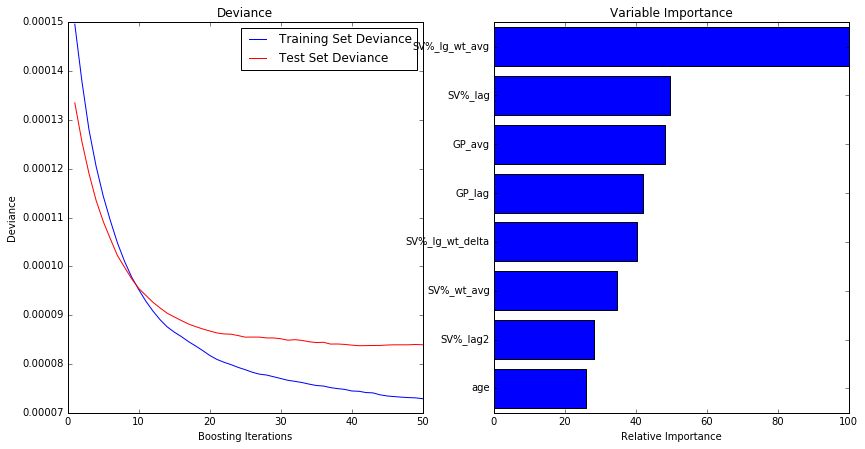

________________________________________________________________________________
Custom plot via ``partial_dependence``



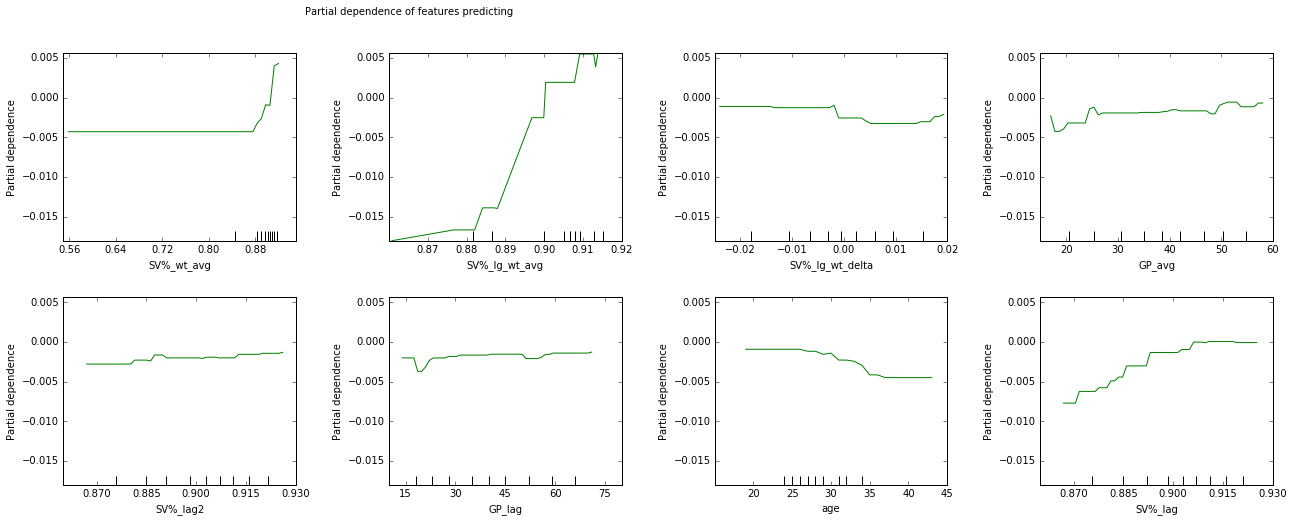

Predicting SV_per_GP with ['SV_per_GP_lag', 'age', 'GP_avg', 'SV_per_GP_lg_wt_avg', 'SV_per_GP_lg_wt_delta', 'SV_per_GP_lag2', 'W_lag', 'SV_per_GP_wt_avg', 'GP_lag']
Dropped 1 rows for missing values
Chosen model = GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1,
             loss='huber', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_samples_leaf=50,
             min_samples_split=500, min_weight_fraction_leaf=0.0,
             n_estimators=50, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
RSME = 2.46927051234
Spearman correlation = 0.505866562482
Test performance best at 49 trees


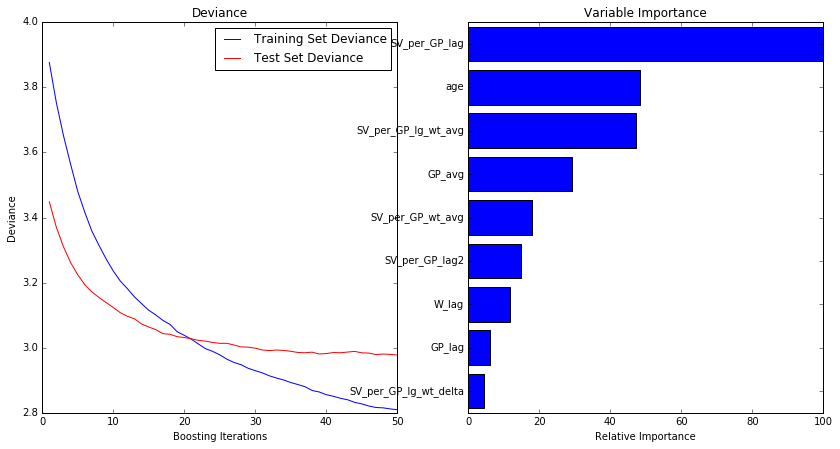

________________________________________________________________________________
Custom plot via ``partial_dependence``



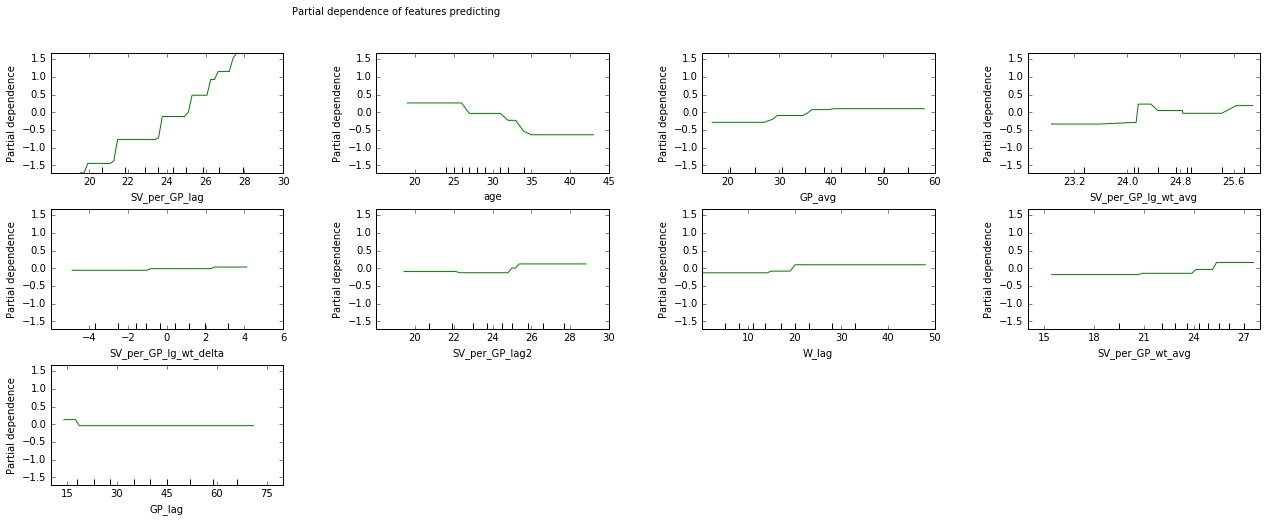

In [15]:
def build_model(X_train, y_train, cv=5):
    """Perform a GradientBoostingRegressor grid search and return the winner."""
    
    # Note to self: Use subsample for stochastic gradiant boosting, next time
    param_grid = {'n_estimators': [50, 100, 200],
                  'max_depth': [2, 3, 4],
                  'min_samples_split': [100, 200, 300, 500],
                  'min_samples_leaf': [5, 10, 20, 50],
                  'learning_rate': [0.01, 0.1],
                  'loss': ['huber']}

    # for testing
    param_grid2 = {'n_estimators': [50],
                  'max_depth': [2],
                  'min_samples_split': [100],
                  'min_samples_leaf': [5],
                  'learning_rate': [0.1],
                  'loss': ['huber']}
    grid_search = GridSearchCV(GradientBoostingRegressor(),
                               param_grid=param_grid,
                               cv=cv).fit(X_train, y_train)

    return grid_search.best_estimator_

def plot_improvement(model, test_score, best_tree):
    """Plot the improvement from additional trees."""
    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.title('Deviance')
    plt.plot(np.arange(model.n_estimators) + 1, model.train_score_, 'b-',
             label='Training Set Deviance')
    plt.plot(np.arange(model.n_estimators) + 1, test_score, 'r-',
             label='Test Set Deviance')
    plt.legend(loc='upper right')
    plt.xlabel('Boosting Iterations')
    plt.ylabel('Deviance')
    print "Test performance best at {} trees".format(best_tree)
    # No plt.show() here because this is meant to be followed by plot_importance()

def plot_importance(model, feature_names):
    """Plot the relative importance of the model features."""
    feature_importance = model.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.subplot(1, 2, 2)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, [feature_names[i] for i in sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()

def plot_features(model, feature_names, target, x):
    """Plot the partial dependence of the feature set."""
    plt.figure(figsize=(20, 10))
    fig, _ = plot_partial_dependence(model,
                                    x,
                                    range(len(feature_names)),
                                    feature_names=feature_names,
                                    n_jobs=-1,
                                    n_cols=4,
                                    grid_resolution=50)
    fig.suptitle('Partial dependence of features predicting'.format(target))
    plt.subplots_adjust(top=0.9)  # tight_layout causes overlap with suptitle
    plt.subplots_adjust(right=1.5)
    print('_' * 80)
    print('Custom plot via ``partial_dependence``')
    print
    #fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [12, 8]
    plt.show()

def get_best_tree_index(model, x, y):
    """Return the index of the best tree."""
    TreeResult = collections.namedtuple('TreeResult', ['min_score', 'best_tree', 'test_score'])

    test_score = np.zeros((model.n_estimators,), dtype=np.float64)

    min_score = None
    best_tree = None
    for i, y_pred in enumerate(model.staged_predict(x)):
        test_score[i] = model.loss_(y, y_pred)
        if min_score is None or test_score[i] < min_score:
            min_score = test_score[i]
            best_tree = i

    return TreeResult(min_score, best_tree, test_score)

def rolling_mean(x, window=10, min_periods=1):
    """Return a rolling mean"""
    return x.rolling(center=False, window=window, min_periods=min_periods).mean()

def rolling_sum(x, window=10, min_periods=1):
    """Return a rolling sum"""
    return x.rolling(center=False, window=window, min_periods=min_periods).sum()

def create_column_permutations(goalies, columns):
    """Create the columns that we'll need as features."""
    for column in columns:
        print "Adding column {}".format(column)

        labels = {'lag': column + '_lag',
                  'lag2': column + '_lag2',
                  'avg': column + '_avg',
                  'avg_weighted': column + '_wt_avg',
                  'league_avg': column + '_lg_avg',
                  'league_delta': column + '_lg_delta',
                  'league_weighted_avg': column + '_lg_wt_avg',
                  'league_weighted_delta': column + '_lg_wt_delta',
                  'total': column + '_total'}

        goalies.loc[:, labels['lag']] = goalies.groupby(['player_name'])[column].shift(1)
        goalies.loc[:, labels['lag2']] = goalies.groupby(['player_name'])[column].shift(2)
        goalies.loc[goalies[labels['lag2']].isnull(), labels['lag2']] = goalies[labels['lag']]
        goalies.loc[:, labels['total']] = (goalies.groupby(['player_name'])['GP'].shift(1) *
                                           goalies.groupby(['player_name'])[column].shift(1))
        goalies.loc[:, labels['avg']] = goalies.groupby('player_name')[labels['lag']].apply(rolling_mean)
        numer = goalies.groupby('player_name')[labels['total']].apply(rolling_sum)
        denom = goalies.groupby('player_name')['GP_lag'].apply(rolling_sum)
        goalies.loc[:, labels['avg_weighted']] = numer / denom

        tmp = goalies.groupby('year')[labels['lag']].mean().to_frame()
        tmp.columns = [labels['league_avg']]
        tmp['year'] = goalies.groupby('year')[labels['lag']].mean().keys()
        goalies = goalies.merge(tmp, how='left', on='year')
        goalies.loc[:, labels['league_delta']] = goalies[labels['lag']] - goalies[labels['league_avg']]

        tmp1 = goalies
        tmp1.loc[:, 'tmp_weight'] = tmp1[labels['lag']]*tmp1['GP_lag']

        tmp = (tmp1.groupby('year')['tmp_weight'].sum()/tmp1.groupby('year')['GP_lag'].sum()).to_frame()
        tmp.columns = [labels['league_weighted_avg']]
        tmp['year'] = goalies.groupby('year')[labels['lag']].mean().keys()
        goalies = goalies.merge(tmp, how='left', on='year')
        goalies.loc[:, labels['league_weighted_delta']] = (goalies[labels['lag']] -
                                                           goalies[labels['league_weighted_avg']])

    return goalies

def create_future_row(goalies, latest_year):
    """Create a false row in the dataset to hold our future values."""
    tmp = goalies[goalies['year'] == latest_year]
    tmp.loc[:, 'age'] += 1
    tmp.loc[:, 'year'] += 1

    return goalies.append(tmp, ignore_index=True)

def define_predictors(stat, extra_predictors):
    """Define the combined predictor set."""
    predictors = list(set(['age',
                           stat + '_lag',
                           stat + '_wt_avg',
                           stat + '_lag2',
                           stat + '_lg_wt_avg',
                           stat + '_lg_wt_delta']))
    if stat in extra_predictors:
        predictors = list(set(predictors + extra_predictors[stat]))

    return predictors

def has_all_predictors(goalies, stat, predictors):
    """Return rows that have all the necessary predictors."""
    has_value = goalies[np.isfinite(goalies[stat])]

    for item in predictors:
        has_value = has_value[np.isfinite(has_value[item])]

    return has_value

def build_data(goalies, min_games=10, min_year=1986):
    """Build out our dataset, creating feature columns and a future dataset."""
    GoalieSplit = collections.namedtuple('GoalieSplit', ['existing', 'future'])

    goalies = goalies[goalies['GP'] >= min_games]

    latest_year = max(goalies['year'])
    goalies = create_future_row(goalies, latest_year).sort_values(by=['year', 'player_name'])

    goalies.loc[:, 'age_sq'] = goalies['age']**2
    goalies.loc[:, 'W_per_GP'] = goalies['W'] / goalies['GP']
    goalies.loc[:, 'SO_per_GP'] = goalies['SO'] / goalies['GP']
    goalies.loc[:, 'SV_per_GP'] = goalies['SV'] / goalies['GP']

    goalies = create_column_permutations(goalies,
                                         ('GP', 'W', 'SO', 'SV%', 'GAA', 'W_per_GP', 'SO_per_GP', 'SV_per_GP'))

    future = goalies[goalies['year'] > latest_year]

    # Note: Save percentage not recorded until the mid-80s
    existing = goalies[np.isfinite(goalies['W_lag']) &
                       np.isfinite(goalies['W']) &
                       (goalies['year'] >= min_year) &
                       (goalies['year'] <= latest_year) &
                       (goalies['GP'] >= min_games)]

    return GoalieSplit(existing, future)

def main(input_file):
    """Main entry point for code."""
    goalie_split = build_data(pd.read_csv(input_file))

    extra_predictors = {'GP': ['W_lag', 'GAA_lag', 'SV%_lag'],
                        'W_per_GP': ['W_lag', 'GP_lag'],
                        'SO_per_GP': ['W_lag', 'GP_lag'],
                        'SV_per_GP': ['W_lag', 'GP_lag', 'GP_avg', 'SV_per_GP_wt_avg'],
                        'GAA': ['GP_lag', 'GP_avg', 'GAA_wt_avg'],
                        'SV%': ['GP_lag', 'GP_avg', 'SV%_wt_avg']}

    for stat in ['GP', 'W_per_GP', 'SO_per_GP', 'GAA', 'SV%', 'SV_per_GP']:
    #for stat in ['SV_per_GP']:
        predictors = define_predictors(stat, extra_predictors)

        print "Predicting {0} with {1}".format(stat, predictors)

        has_value = has_all_predictors(goalie_split.existing, stat, predictors)

        print "Dropped {} rows for missing values".format(len(goalie_split.existing) - len(has_value))

        x = has_value.loc[:, predictors]
        y = has_value.loc[:, stat]
        x_goalies_future = goalie_split.future.loc[:, predictors]

        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

        model = build_model(X_train, y_train)

        print "Chosen model = {}".format(model)

        has_value.loc[:, 'p_' + stat] = model.predict(x)
        goalie_split.future.loc[:, 'p_' + stat] = model.predict(x_goalies_future)

        print "RSME = {}".format(math.sqrt(metrics.mean_squared_error(has_value[stat], has_value['p_' + stat])))

        spearman = scipy.stats.spearmanr(has_value[stat], has_value['p_' + stat])

        print "Spearman correlation = {}".format(spearman.correlation)

        tree_result = get_best_tree_index(model, X_test, y_test)

        plot_improvement(model, tree_result.test_score, tree_result.best_tree)
        plot_importance(model, predictors)
        plot_features(model, predictors, stat, X_train)
        
    GoalieSplit = collections.namedtuple('GoalieSplit', ['existing', 'future'])

    return GoalieSplit(goalie_split.existing, goalie_split.future)

results = main("~/code/fun/nhl/goalie_data/stats.csv")

In [74]:
goalies2[(goalies2['player_name'] == 'Braden Holtby') & (goalies2['year'] == 2016)].loc[:,
    ['GAA_lg_avg', 'age', 'GAA_lag', 'GP_avg', 'GAA_lg_delta', 'GAA_wt_avg', 'GAA_avg', 'GAA_lag2', 'GP_lag', 'GAA_lg_wt_avg']]

#goalies_future.loc[:, ['player_name', 'year', 'GP', 'p_GP', 'p_GAA']].sort_values(by=['GP'], ascending=False)

,GAA_lg_avg,age,GAA_lag,GP_avg,GAA_lg_delta,GAA_wt_avg,GAA_avg,GAA_lag2,GP_lag,GAA_lg_wt_avg
3915,2.585467,26,2.22,35.6,-0.365467,2.439494,2.386,2.85,73.0,2.505377


In [26]:

results.future.loc[:, 'p_W'] = results.future['p_GP'] * results.future['p_W_per_GP']
results.future.loc[:, 'p_SO'] = results.future['p_GP'] * results.future['p_SO_per_GP']
results.future.loc[:, 'p_SV'] = results.future['p_GP'] * results.future['p_SV_per_GP']

results.future.loc[:, ['player_name', 'year', 'p_GP', 'p_W', 'p_SO', 'p_GAA', 'p_SV%', 'p_SV', 'GP', 'W', 'SO', 'GAA', 'p_SV_per_GP']].sort_values(by=['p_SV'],
                                                                                                                                   ascending=False)
pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)

results.future.loc[:, ['player_name', 'p_GP', 'p_SV', 'p_SV_per_GP']].sort_values(by=['p_SV'], ascending=False)

height has been deprecated.



,player_name,p_GP,p_SV,p_SV_per_GP
2939,Jonathan Quick,62.918087,1515.856728,24.092543
2909,Braden Holtby,60.520816,1496.313150,24.723942
2947,Marc-Andre Fleury,58.263963,1483.621126,25.463787
2963,Semyon Varlamov,56.296141,1474.759177,26.196452
2927,Henrik Lundqvist,56.081103,1456.625325,25.973550
2967,Tuukka Rask,55.983688,1448.499370,25.873597
2955,Pekka Rinne,59.417105,1437.895619,24.200028
2965,Steve Mason,55.293764,1430.648565,25.873597
2919,Cory Schneider,56.745450,1428.967182,25.182057
2959,Roberto Luongo,55.565631,1418.441805,25.527323


In [9]:
pred = goalies_future.loc[:, ['player_name', 'year', 'p_GP', 'p_W', 'p_SO', 'p_GAA', 'p_SV%']].sort_values(by=['p_GP'],ascending=False)

pred.to_csv('goalies_basic_projections_201617_as_of_20160917.csv', float_format="%.3f", index=False)

In [86]:
goalies_future.loc[:, ['player_name', 'year', 'p_GP', 'p_W', 'p_SO', 'p_GAA', 'p_SV%', 'GP', 'W', 'SO', 'GAA', 'SV%']].describe()

,year,p_GP,p_W,p_SO,p_GAA,p_SV%,GP,W,SO,GAA,SV%
count,69.0,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,2017.0,41.804197,18.137141,2.313217,2.582159,0.911113,37.449275,17.594203,2.173913,2.548696,0.913870
std,0.0,10.179805,6.095376,1.018758,0.134081,0.003501,17.023804,10.742054,1.773635,0.313443,0.010408
min,2017.0,25.726938,9.208483,0.895828,2.340128,0.899040,12.000000,2.000000,0.000000,2.000000,0.879000
25%,2017.0,31.971433,12.622590,1.295912,2.465128,0.909093,23.000000,9.000000,1.000000,2.320000,0.908000
50%,2017.0,40.844850,16.957921,2.168886,2.596866,0.912515,36.000000,15.000000,2.000000,2.550000,0.917000
75%,2017.0,51.685867,22.454247,3.109586,2.688580,0.913368,54.000000,25.000000,3.000000,2.760000,0.920000
max,2017.0,60.135598,30.104078,4.306672,2.850102,0.916667,68.000000,48.000000,7.000000,3.510000,0.934000
